['Power Plant', 'Device', 'Category', 'Event', 'Subevent / Categorization', 'Start Date', 'End Date', 'Duration', 'Categorization description']


C:\Users\eshwa\AppData\Local\Temp\ipykernel_9636\1849374700.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


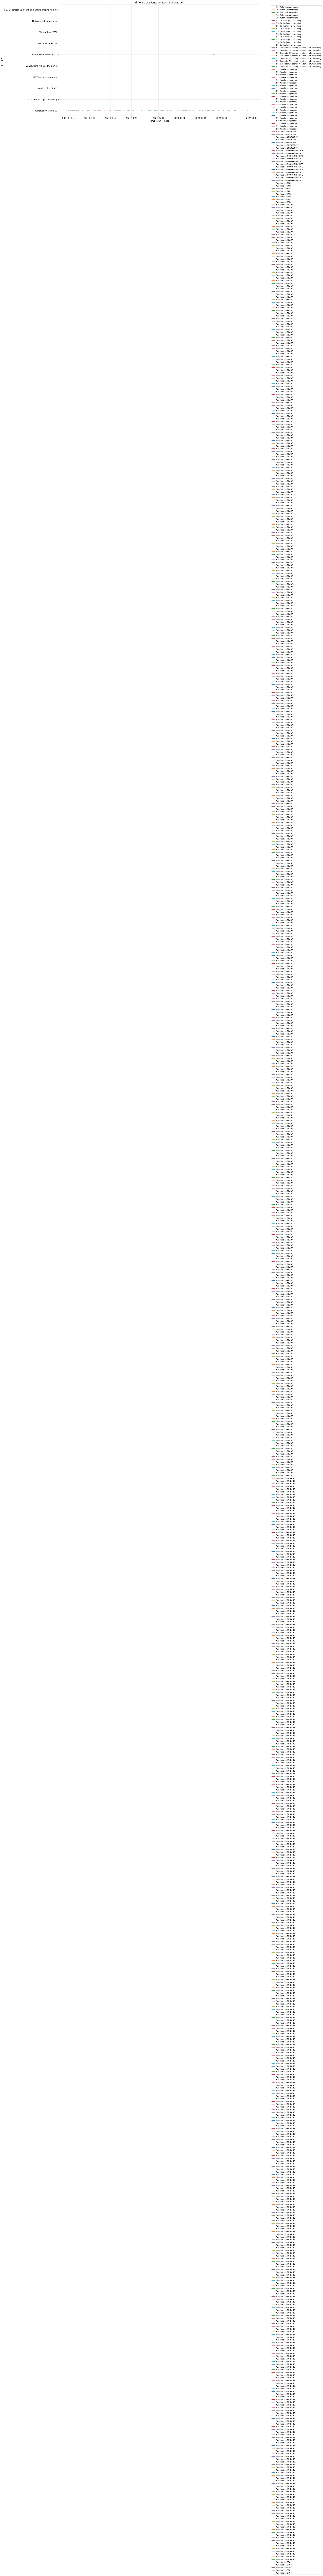

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Use sep=";" since your CSV is semicolon-delimited
df = pd.read_csv("Full AWS.csv", sep=';').sample(n=1000, random_state=42)

# Strip spaces
df.columns = df.columns.str.strip()

# Check columns now
print(df.columns.tolist())  # Should show proper separate columns

# Convert dates
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce', dayfirst=True)
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce', dayfirst=True)

# Clean up
df = df.dropna(subset=['Start Date', 'End Date', 'Event'])
df = df.sort_values(by='Start Date')

# Limit to top 10 events
top_events = df['Event'].value_counts().head(10).index
df_plot = df[df['Event'].isin(top_events)]

# Assign numeric levels for plotting
event_levels = {event: i for i, event in enumerate(df_plot['Event'].unique())}
df_plot = df_plot.copy()
df_plot['Event Level'] = df_plot['Event'].map(event_levels)

# Plot
plt.figure(figsize=(18, 10))
for event, group in df_plot.groupby('Event'):
    plt.plot([group['Start Date'], group['End Date']],
             [group['Event Level'], group['Event Level']],
             linewidth=2, label=event)

plt.yticks(list(event_levels.values()), list(event_levels.keys()))
plt.xlabel("Time (Start → End)")
plt.ylabel("Event Type")
plt.title("Timeline of Events by Start–End Duration")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\eshwa\AppData\Local\Temp\ipykernel_9636\3825459721.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Event Level'] = df_plot['Event'].map(event_levels)


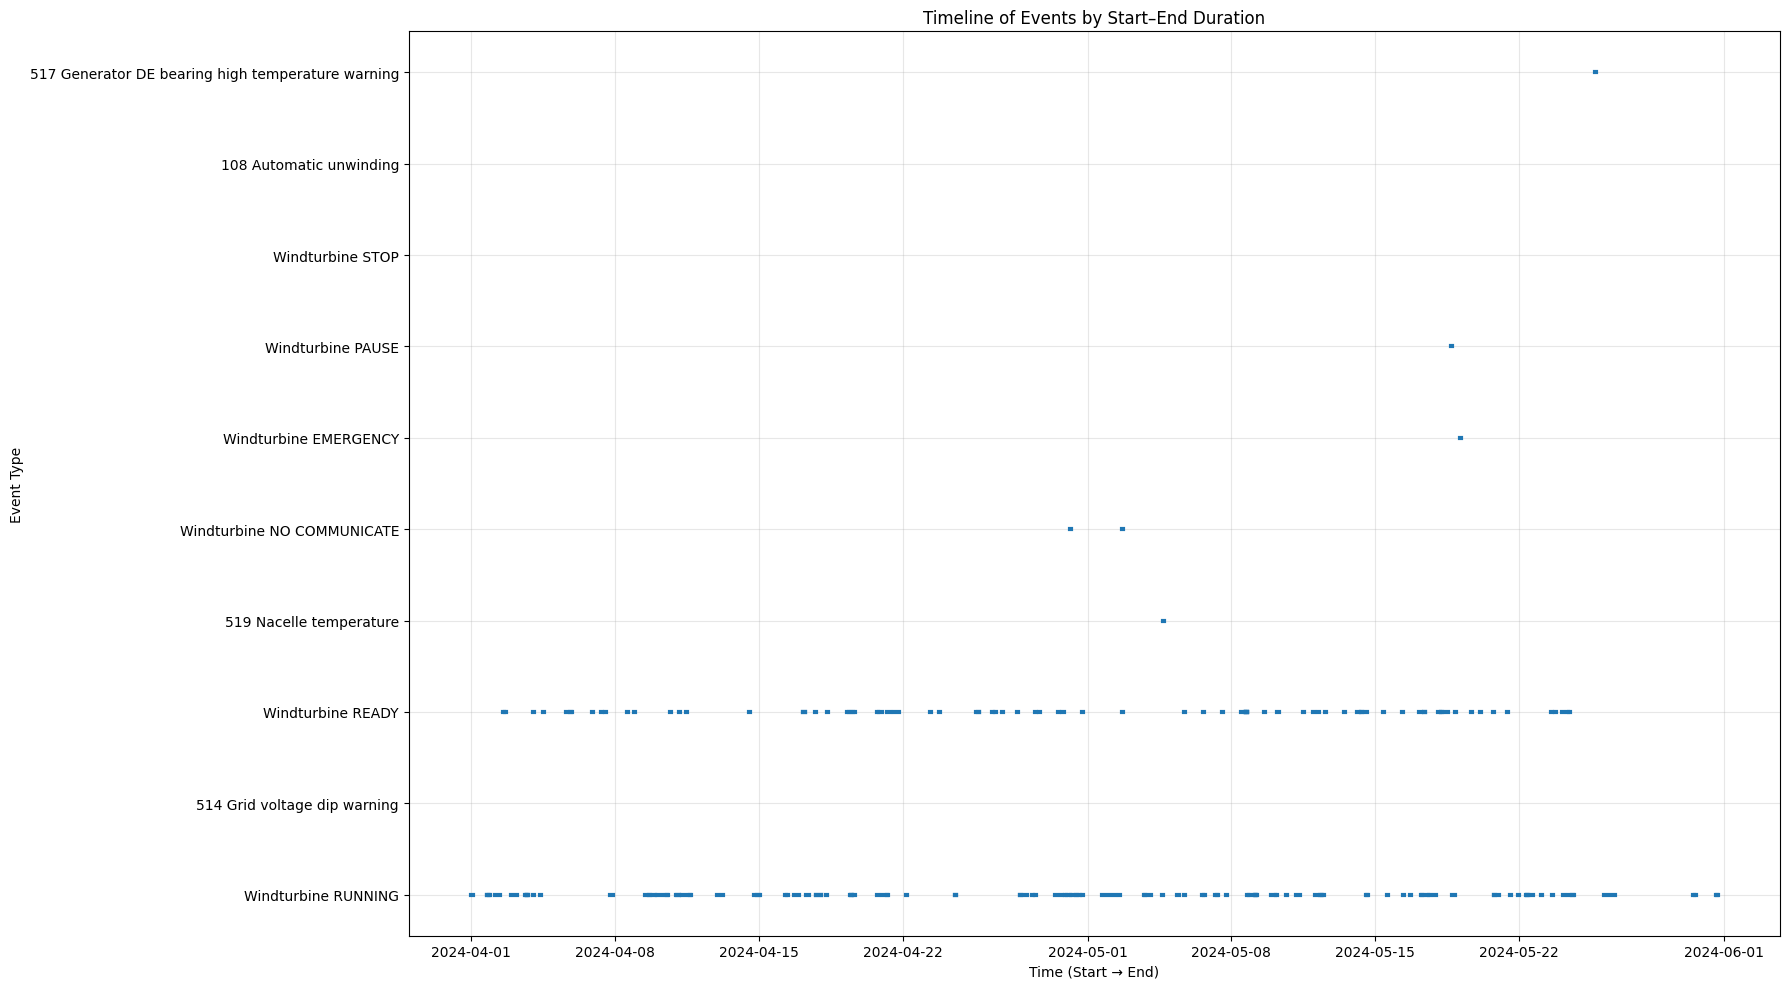

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV (semicolon-separated), sample 1000 rows
df = pd.read_csv("Full AWS.csv", sep=';').sample(n=1000, random_state=42)
df.columns = df.columns.str.strip()

# Convert dates
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce', dayfirst=True)
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce', dayfirst=True)

# Clean up
df = df.dropna(subset=['Start Date', 'End Date', 'Event'])
df = df.sort_values(by='Start Date')

# Optional: limit to top 10 events for readability
top_events = df['Event'].value_counts().head(10).index
df_plot = df[df['Event'].isin(top_events)]

# Assign numeric levels for Y-axis
event_levels = {event: i for i, event in enumerate(df_plot['Event'].unique())}
df_plot['Event Level'] = df_plot['Event'].map(event_levels)

# Plot
plt.figure(figsize=(18, 10))
color = "#1f77b4"  # all lines same color (blue)

for _, row in df_plot.iterrows():
    plt.plot([row['Start Date'], row['End Date']], 
             [row['Event Level'], row['Event Level']], 
             color=color, linewidth=3)

# Y-axis labels
plt.yticks(list(event_levels.values()), list(event_levels.keys()))
plt.xlabel("Time (Start → End)")
plt.ylabel("Event Type")
plt.title("Timeline of Events by Start–End Duration")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


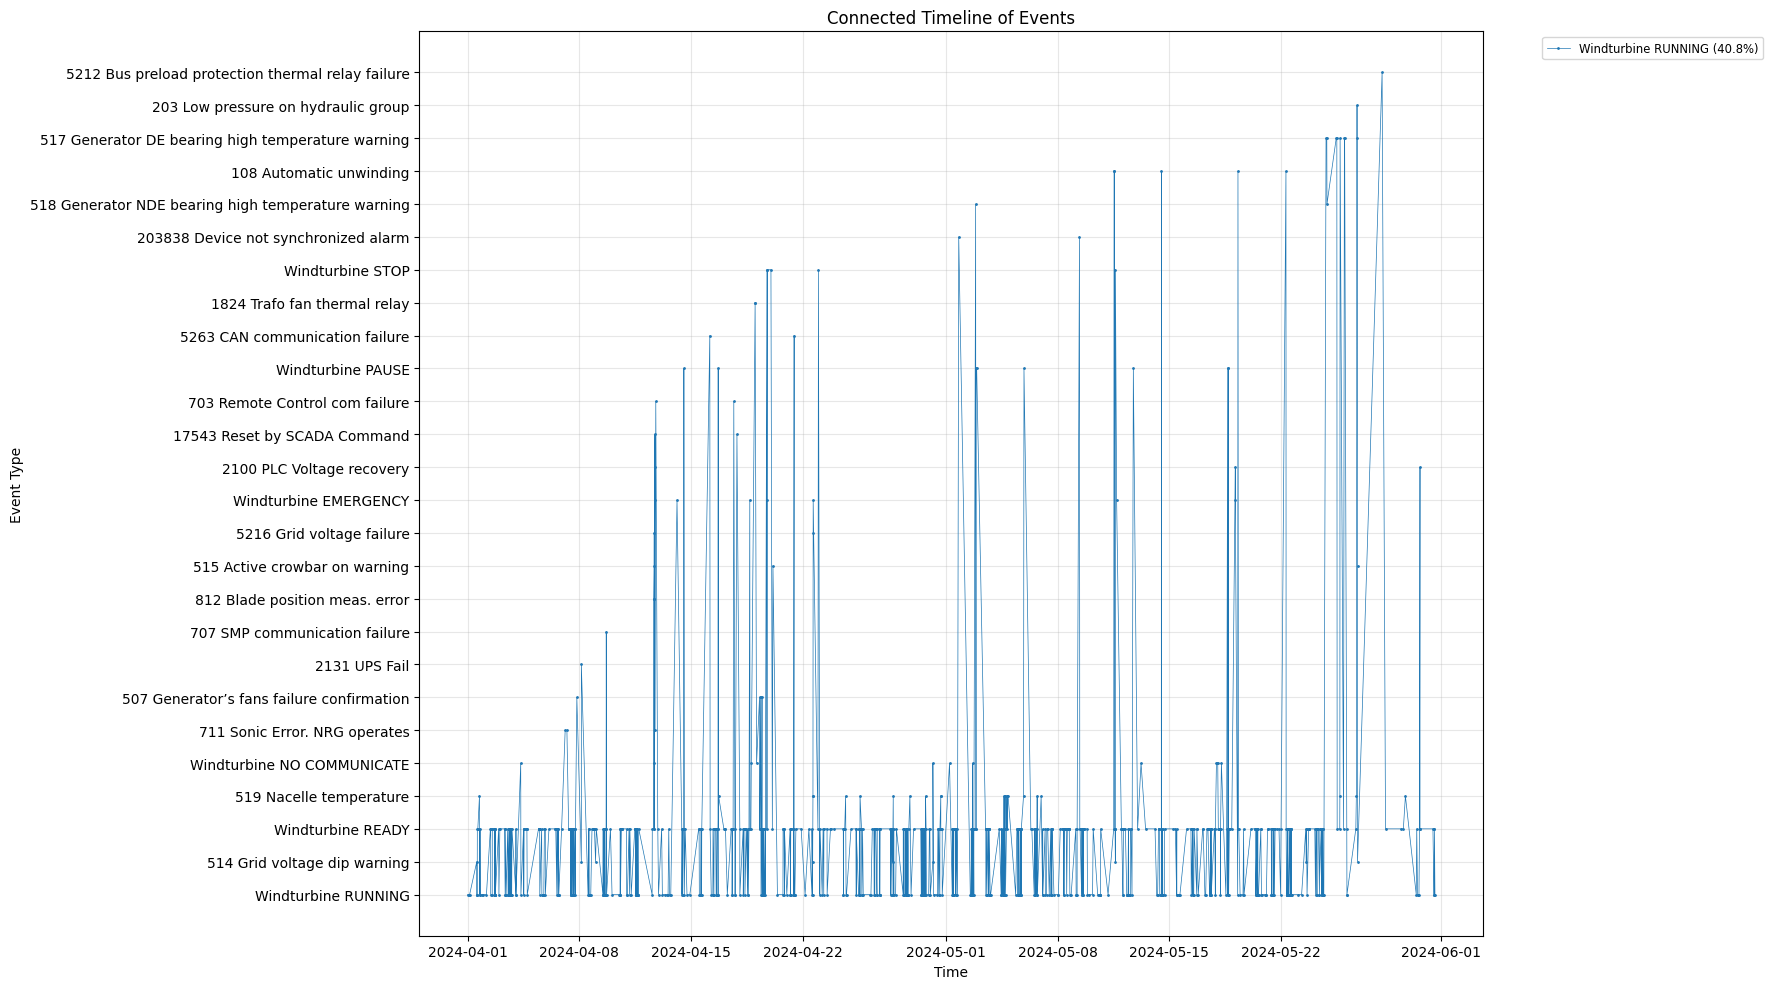

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV (semicolon-separated), sample 1000 rows
df = pd.read_csv("Full AWS.csv", sep=';').sample(n=1000, random_state=42)
df.columns = df.columns.str.strip()

# Convert dates
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['Start Date', 'Event'])
df = df.sort_values(by='Start Date')  # chronological order

# Map events to numeric Y-values
event_levels = {event: i for i, event in enumerate(df['Event'].unique())}
df['Event Level'] = df['Event'].map(event_levels)

# Calculate percentage of each event type
event_counts = df['Event'].value_counts()
event_percent = (event_counts / event_counts.sum() * 100).round(1)

# Plot connected line with small dots
plt.figure(figsize=(18, 10))
plt.plot(df['Start Date'], df['Event Level'], color="#1f77b4", linewidth=0.5, marker='o', markersize=1)

# Y-axis labels
plt.yticks(list(event_levels.values()), list(event_levels.keys()))
plt.xlabel("Time")
plt.ylabel("Event Type")
plt.title("Connected Timeline of Events")
plt.grid(alpha=0.3)

# Create legend with percentage for each event type
legend_labels = [f"{event} ({event_percent.get(event, 0)}%)" for event in event_levels.keys()]
plt.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()


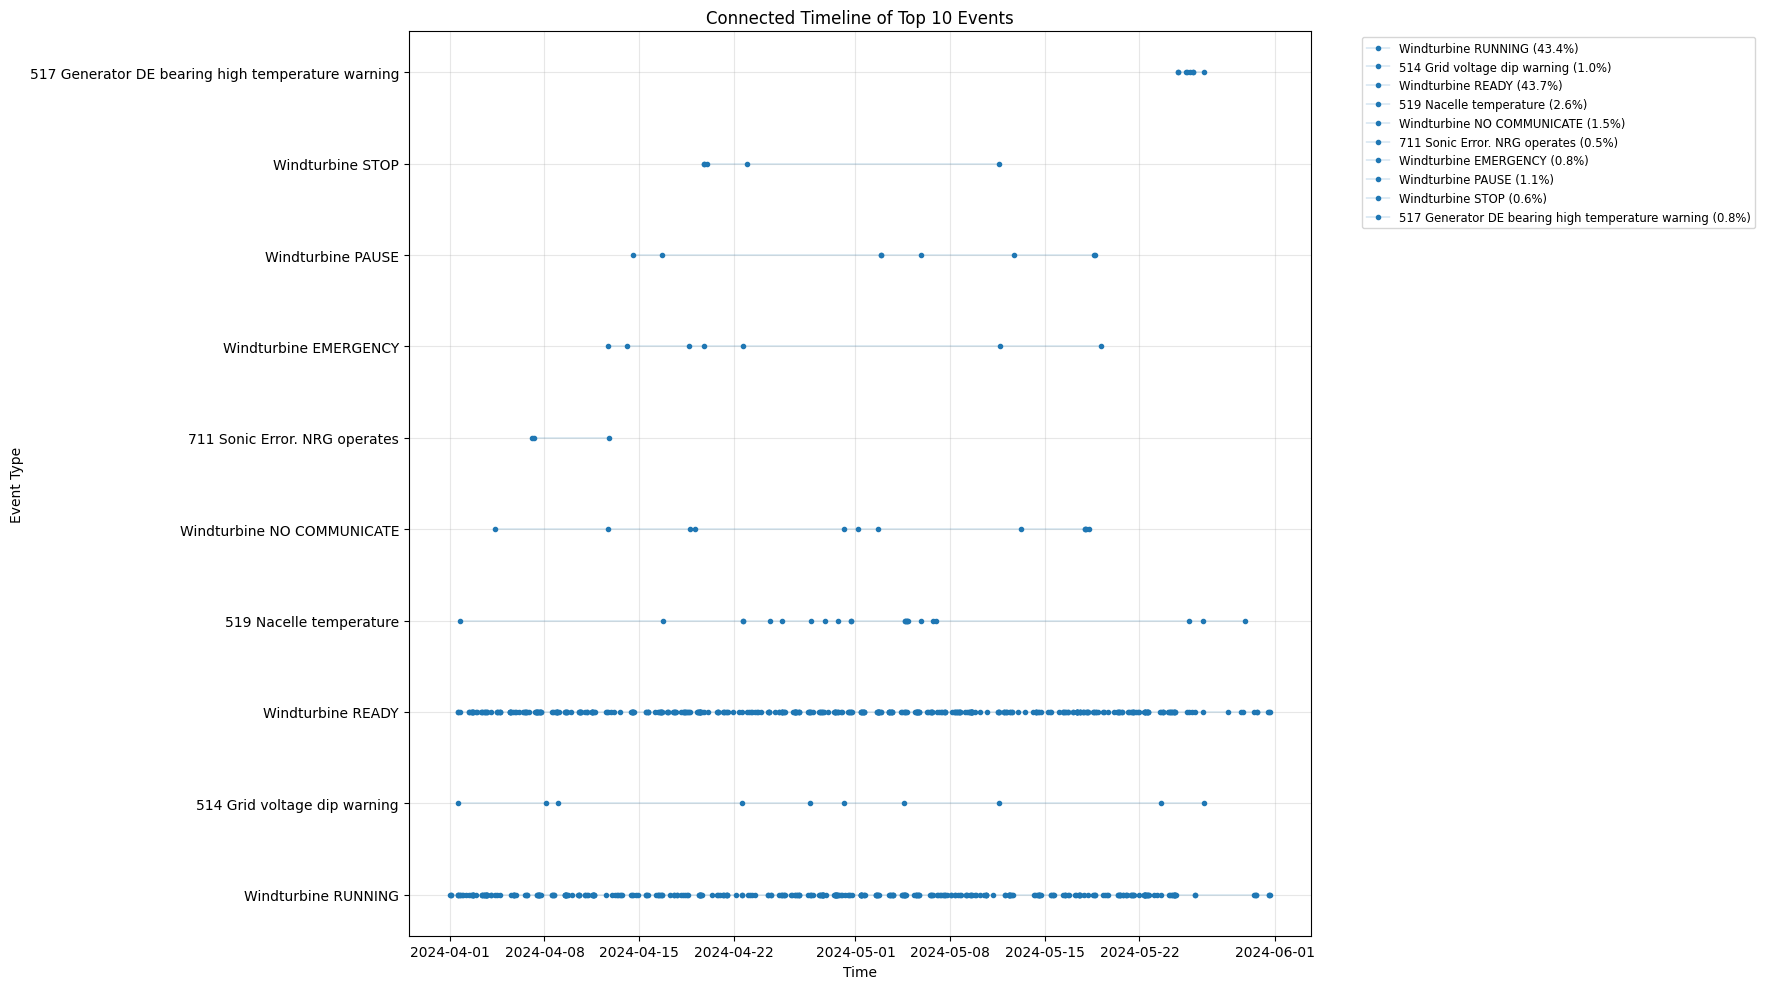

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load full CSV
df_full = pd.read_csv("Full AWS.csv", sep=';')
df_full.columns = df_full.columns.str.strip()

# Calculate percentages from full dataset
event_counts_full = df_full['Event'].value_counts()
event_percent_full = (event_counts_full / event_counts_full.sum() * 100).round(1)

# Select top 10 events by percentage
top_10_events = event_counts_full.head(10).index

# Sample 1000 rows for plotting
df = df_full.sample(n=1000, random_state=42)
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['Start Date', 'Event'])
df = df[df['Event'].isin(top_10_events)]  # keep only top 10 events
df = df.sort_values(by='Start Date')

# Map events to numeric Y-values for plotting
event_levels = {event: i for i, event in enumerate(df['Event'].unique())}
df['Event Level'] = df['Event'].map(event_levels)

# Plot each event type separately to get proper legend
plt.figure(figsize=(18, 10))
for event in df['Event'].unique():
    subset = df[df['Event'] == event]
    plt.plot(subset['Start Date'], subset['Event Level'], 
             linewidth=0.2, marker='o', markersize=3,
             label=f"{event} ({event_percent_full[event]}%)", color="#1f77b4")

# Y-axis labels
plt.yticks(list(event_levels.values()), list(event_levels.keys()))
plt.xlabel("Time")
plt.ylabel("Event Type")
plt.title("Connected Timeline of Top 10 Events")
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 1️⃣ Load full dataset
# ----------------------------
df_full = pd.read_csv("Full AWS.csv", sep=';')
df_full.columns = df_full.columns.str.strip()

# ----------------------------
# 2️⃣ Convert dates
# ----------------------------
df_full['Start Date'] = pd.to_datetime(df_full['Start Date'], errors='coerce', dayfirst=True)
df_full['End Date'] = pd.to_datetime(df_full['End Date'], errors='coerce', dayfirst=True)

# Drop rows with missing critical values
df_full = df_full.dropna(subset=['Start Date', 'End Date', 'Event', 'Device'])

# ----------------------------
# 3️⃣ Filter by device
# ----------------------------
df_device = df_full[df_full['Device'] == "G97-N24"]

# ----------------------------
# 4️⃣ Filter by specific day (1st April 2024)
# ----------------------------
# Check if Start Date OR End Date falls on 1/4/2024
date_filter = (df_device['Start Date'].dt.date == pd.to_datetime("01/04/2024", dayfirst=True).date()) | \
              (df_device['End Date'].dt.date == pd.to_datetime("01/04/2024", dayfirst=True).date())
df_day = df_device[date_filter]

# ----------------------------
# 5️⃣ Optional: Sort by Start Date
# ----------------------------
df_day = df_day.sort_values(by='Start Date')

# ----------------------------
# 6️⃣ Quick check
# ----------------------------
print(df_day[['Device', 'Event', 'Start Date', 'End Date']])


     Device                         Event              Start Date  \
0   G97-N24           Windturbine RUNNING 2024-04-01 00:00:00.000   
1   G97-N24             Windturbine READY 2024-04-01 01:33:34.430   
2   G97-N24           Windturbine RUNNING 2024-04-01 01:40:25.027   
3   G97-N24             Windturbine READY 2024-04-01 02:46:00.556   
4   G97-N24           Windturbine RUNNING 2024-04-01 08:25:24.886   
5   G97-N24             Windturbine READY 2024-04-01 08:44:42.666   
6   G97-N24           Windturbine RUNNING 2024-04-01 11:57:47.292   
7   G97-N24             Windturbine READY 2024-04-01 12:00:14.046   
8   G97-N24           Windturbine RUNNING 2024-04-01 12:57:06.928   
9   G97-N24             Windturbine READY 2024-04-01 13:01:48.571   
10  G97-N24           Windturbine RUNNING 2024-04-01 13:03:29.201   
11  G97-N24             Windturbine READY 2024-04-01 13:06:17.244   
12  G97-N24           Windturbine RUNNING 2024-04-01 13:14:01.088   
13  G97-N24             Windturbin

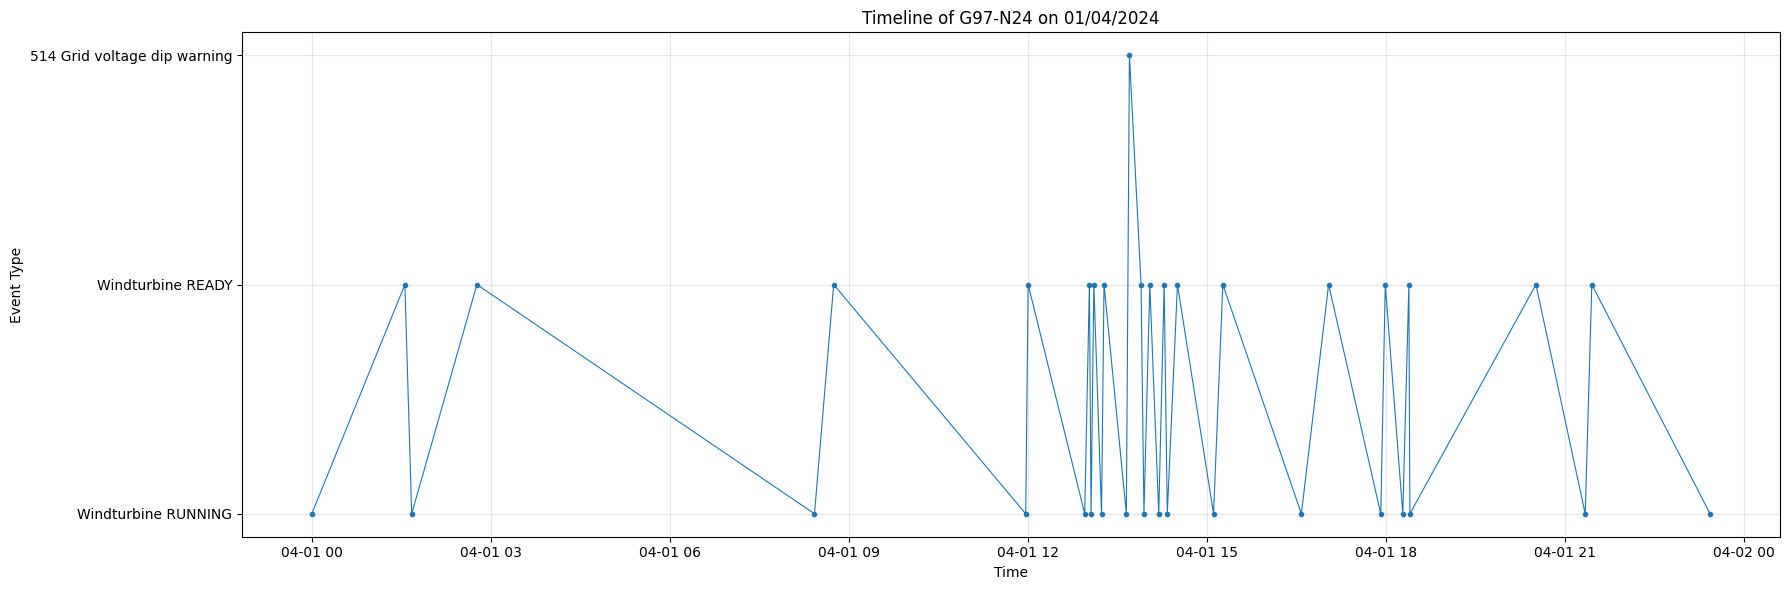

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df_full = pd.read_csv("Full AWS.csv", sep=';')
df_full.columns = df_full.columns.str.strip()

df_full['Start Date'] = pd.to_datetime(df_full['Start Date'], errors='coerce', dayfirst=True)
df_full['End Date'] = pd.to_datetime(df_full['End Date'], errors='coerce', dayfirst=True)

df_full = df_full.dropna(subset=['Start Date', 'Event', 'Device'])

df_device = df_full[df_full['Device'] == "G97-N24"]

date_filter = (df_device['Start Date'].dt.date == pd.to_datetime("01/04/2024", dayfirst=True).date()) | \
              (df_device['End Date'].dt.date == pd.to_datetime("01/04/2024", dayfirst=True).date())
df_day = df_device[date_filter]

df_day = df_day.sort_values(by='Start Date')

event_levels = {event: i for i, event in enumerate(df_day['Event'].unique())}
df_day['Event Level'] = df_day['Event'].map(event_levels)

plt.figure(figsize=(18, 6))
plt.plot(df_day['Start Date'], df_day['Event Level'], 
         color="#1f77b4", linewidth=0.8, marker='o', markersize=3)

plt.yticks(list(event_levels.values()), list(event_levels.keys()))
plt.xlabel("Time")
plt.ylabel("Event Type")
plt.title("Timeline of G97-N24 on 01/04/2024")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
